In [400]:
# General import to be needed
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import hvplot.pandas

# import yfinance
import yfinance as yf


# Import warning
import warnings
warnings.filterwarnings('ignore')

In [401]:
#Get SPY Data for last 1172 days
data = yf.download("SPY", start="2017-01-20", end="2020-04-06")
# Put into Pandas DataFrame
spy = pd.DataFrame(data)
spy.head()

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-01-20  226.699997  227.309998  225.970001  226.740005  212.961365   
2017-01-23  226.740005  226.809998  225.270004  226.149994  212.407181   
2017-01-24  226.399994  228.080002  226.270004  227.600006  213.769119   
2017-01-25  228.699997  229.570007  228.509995  229.570007  215.619400   
2017-01-26  229.399994  229.710007  229.009995  229.330002  215.394012   

               Volume  
Date                   
2017-01-20  129168600  
2017-01-23   75061600  
2017-01-24   95555300  
2017-01-25   84437700  
2017-01-26   59970700

In [402]:
# Clean Data and Drop non-essential columns
spy_data= spy.drop(columns=["High", "Low", "Open", "Volume", "Close"])
spy_data.columns = ["SPY Close"]
spy_data.head()

SPY Close
Date                  
2017-01-20  212.961365
2017-01-23  212.407181
2017-01-24  213.769119
2017-01-25  215.619400
2017-01-26  215.394012

In [403]:
# Calculate the portfolio daily returns
spy_data["Daily Returns"] = spy_data["SPY Close"].pct_change()


# Calculate the Cumulative returns
spy_data["Cumulative Returns"]= (1+ spy_data["Daily Returns"]).cumprod()-1

# Validate Data
spy_data.head()

SPY Close  Daily Returns  Cumulative Returns
Date                                                     
2017-01-20  212.961365            NaN                 NaN
2017-01-23  212.407181      -0.002602           -0.002602
2017-01-24  213.769119       0.006412            0.003793
2017-01-25  215.619400       0.008656            0.012481
2017-01-26  215.394012      -0.001045            0.011423

# Prepare Dataframe to Determine Benchmarks

In [404]:
# Prepare DataFrame for metrics
metrics = [
    'Annual Return',
    'Cumulative Returns',
    'Annual Volatility',
    'Sharpe Ratio',
    'Sortino Ratio']

columns = ['Backtest']

# Initialize the DataFrame with index set to evaluation metrics and column as `Backtest` (just like PyFolio)
spy_evaluation_df = pd.DataFrame(index=metrics, columns=columns)


# Annualized Returns
spy_evaluation_df.loc['Annual Return'] = (
    spy_data['Daily Returns'].mean() * 252
)

# Calculate cumulative return
spy_evaluation_df.loc["Cumulative Returns"] =  (spy_data['Cumulative Returns'])

# Calculate annual volatility
spy_evaluation_df.loc['Annual Volatility'] = (
    spy_data['Daily Returns'].std() * np.sqrt(252)
)

# Calculate Sharpe Ratio 
spy_evaluation_df.loc['Sharpe Ratio'] = (
    spy_data['Daily Returns'].mean() * 252) / (
    spy_data['Daily Returns'].std() * np.sqrt(252)
)

# Calculate cumulative return
spy_evaluation_df.loc['Cumulative Returns'] = spy_data['Cumulative Returns'][-1]

# Calculate Downside Return
sortino_ratio_df = spy_data[['Daily Returns']]
sortino_ratio_df.loc[:,'Downside Returns'] = 0
sortino_ratio_df.head()

target = 0
mask = sortino_ratio_df['Daily Returns'] < target
sortino_ratio_df.loc[mask, 'Downside Returns'] = sortino_ratio_df['Daily Returns']**2

# Calculate Sortino Ratio
down_stdev = np.sqrt(sortino_ratio_df['Downside Returns'].mean()) * np.sqrt(252)
expected_return = sortino_ratio_df['Daily Returns'].mean() * 252
sortino_ratio = expected_return/down_stdev

spy_evaluation_df.loc['Sortino Ratio'] = sortino_ratio

spy_evaluation_df

Backtest
Annual Return       0.0676449
Cumulative Returns   0.165423
Annual Volatility    0.198038
Sharpe Ratio         0.341575
Sortino Ratio        0.454415

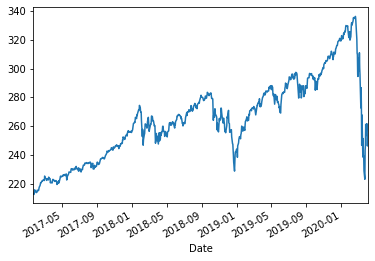

In [405]:
# Create Simple Plot of SPY Closing Prices
spy_data['SPY Close'].plot()

In [406]:
# HVPLOT SPY Close Data
spy_data.hvplot.line(x='Date', y='SPY Close', line_color="green")

:Curve   [Date]   (SPY Close)

In [407]:
#Get VIX Data for last 1172 days
vix = yf.download("^VIX", start="2017-01-20", end="2020-04-06")
vix.head()

[*********************100%***********************]  1 of 1 completed


Open   High    Low  Close  Adj Close  Volume
Date                                                     
2017-01-20  12.58  12.59  11.53  11.54      11.54       0
2017-01-23  12.30  12.62  11.59  11.77      11.77       0
2017-01-24  11.82  11.89  11.04  11.07      11.07       0
2017-01-25  10.79  11.05  10.51  10.81      10.81       0
2017-01-26  10.61  11.01  10.60  10.63      10.63       0

# Generate Additional Value For Neural Network

In [408]:
# Put VIX Into DataFrame
vix2 = pd.DataFrame(vix)
# Clean Data and Drop non-essential columns
vix_data= vix2.drop(columns=["High", "Low", "Open", "Volume", "Close"])
vix_data.columns = ["VIX Close"]
vix_data.head()
vix_data.describe()

VIX Close
count  807.000000
mean    15.844833
std      8.838167
min      9.140000
25%     11.630000
50%     13.470000
75%     16.590000
max     82.690002

In [409]:
# HVPLOT VIX Index Close Data
vix_data.hvplot.line(x='Date', y='VIX Close', line_color="blue")

:Curve   [Date]   (VIX Close)

In [410]:
# Combine SPY & VIX Dataframes
all_data = pd.concat([spy_data, vix_data],axis="columns", join="inner")
all_data.head()

SPY Close  Daily Returns  Cumulative Returns  VIX Close
Date                                                                
2017-01-20  212.961365            NaN                 NaN      11.54
2017-01-23  212.407181      -0.002602           -0.002602      11.77
2017-01-24  213.769119       0.006412            0.003793      11.07
2017-01-25  215.619400       0.008656            0.012481      10.81
2017-01-26  215.394012      -0.001045            0.011423      10.63

In [411]:

spy_data.hvplot.line(x='Date', y='SPY Close',
                     line_color="green") * vix_data.hvplot.line(
                    x='Date', y='VIX Close', line_color="blue")

:Overlay
   .Curve.I  :Curve   [Date]   (SPY Close)
   .Curve.II :Curve   [Date]   (VIX Close)

In [412]:
all_data.hvplot(x='Date', y=['SPY Close', 'VIX Close'],
                value_label='Close Price', subplots=True, width=300, height=200)

:NdLayout   [Variable]
   :Curve   [Date]   (Close Price)

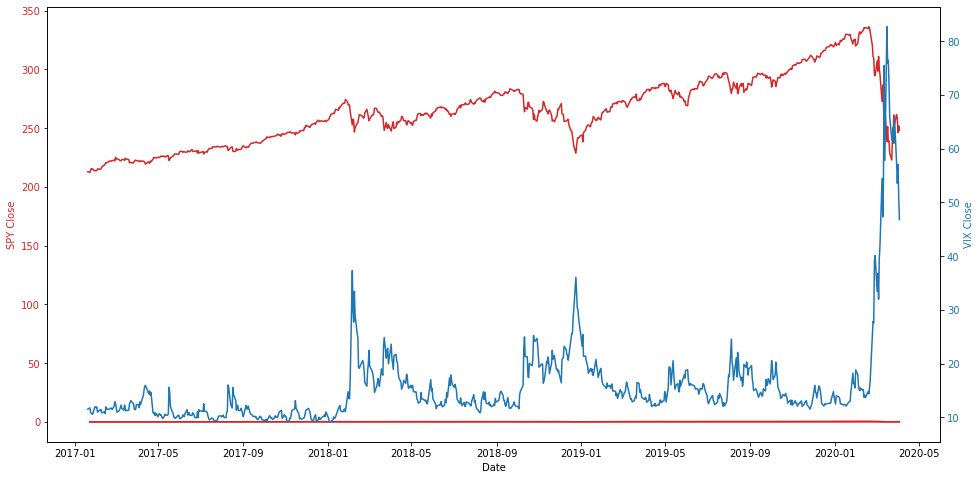

In [413]:
# Overlay Charts of SPY and VIX with a secondary y-axis
data1 = spy_data
data2 = vix_data

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('SPY Close', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('VIX Close', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)


plt.gcf().set_size_inches(16, 8)
plt.show()

In [414]:
# Evaluate Correlations between SPY & VIX (Inversely Correlated)
all_data.corr()

SPY Close  Daily Returns  Cumulative Returns  VIX Close
SPY Close            1.000000       0.039166            1.000000   0.037505
Daily Returns        0.039166       1.000000            0.039166  -0.221599
Cumulative Returns   1.000000       0.039166            1.000000   0.036479
VIX Close            0.037505      -0.221599            0.036479   1.000000

# Add New Features Options Sentiment SPX

In [415]:
# Import Option Sentiment (1M 25 Delta Puts and Calls along with Spread and Ratios)
from pathlib import Path
filepath = ("ling.csv")
spyopt_df=pd.read_csv(filepath)
spyopt_df["Date"] = pd.to_datetime(spyopt_df["Date"], infer_datetime_format=True)
spyopt_df.set_index(("Date"), inplace=True)
spyopt_df.tail()

# We shift the options data delta -5 days to train model for prediction forecasting
#spyopt_df[['SPX 1M 25DP Vol BVOL INDEX','SPX 1M 25DC Vol BVOL INDEX','SPX 1M 100 Vol BVOL INDEX',
#          'P/C Ratio', 'P/C Spread', 'P/ATM Ratio', 'P/ATM Spread', 'ATM/C Ratio', 'ATM/C Spread']].shift(-5)

SPX 1M 25DP Vol BVOL INDEX  SPX 1M 25DC Vol BVOL INDEX  \
Date                                                                 
2020-04-01                     63.6275                     41.4488   
2020-04-02                     56.7444                     36.8025   
2020-04-03                     52.8947                     35.8183   
2020-04-06                     45.8773                     31.1317   
2020-04-07                     49.6727                     32.6520   

            SPX 1M 100 Vol BVOL INDEX  P/C Ratio  P/C Spread  P/ATM Ratio  \
Date                                                                        
2020-04-01                    52.6290       1.54       22.18         1.21   
2020-04-02                    46.6374       1.54       19.94         1.22   
2020-04-03                    46.3582       1.48       17.08         1.14   
2020-04-06                    37.1560       1.47       14.75         1.23   
2020-04-07                    40.4303       1.52       17.02         1.23   

            P/ATM Spread  ATM/C Ratio  ATM/C Spread  
Date                                                 
2020-04-01         11.00         1.27         11.18  
2020-04-02         10.11         1.27          9.83  
2020-04-03          6.54         1.29         10.54  
2020-04-06          8.72         1.19          6.02  
2020-04-07          9.24         1.24          7.78

In [416]:
# Concat all Dataframes Drop Null Values and Run Correlation
all_data2 = pd.concat([all_data, spyopt_df], axis=1)
all_data2.isnull().sum()
all_data2.dropna(inplace=True)
all_data2.head()
#all_data2.describe()
#all_data2.corr()

SPY Close  Daily Returns  Cumulative Returns  VIX Close  \
Date                                                                   
2017-01-23  212.407181      -0.002602           -0.002602      11.77   
2017-01-24  213.769119       0.006412            0.003793      11.07   
2017-01-25  215.619400       0.008656            0.012481      10.81   
2017-01-26  215.394012      -0.001045            0.011423      10.63   
2017-01-27  215.055878      -0.001570            0.009835      10.58   

            SPX 1M 25DP Vol BVOL INDEX  SPX 1M 25DC Vol BVOL INDEX  \
Date                                                                 
2017-01-23                     11.4007                      7.7258   
2017-01-24                     11.2947                      7.9025   
2017-01-25                     11.1970                      7.5949   
2017-01-26                     11.3364                      7.7880   
2017-01-27                     10.1858                      7.2431   

            SPX 1M 100 Vol BVOL INDEX  P/C Ratio  P/C Spread  P/ATM Ratio  \
Date                                                                        
2017-01-23                     8.8658       1.48        3.67         1.29   
2017-01-24                     8.9462       1.43        3.39         1.26   
2017-01-25                     8.6727       1.47        3.60         1.29   
2017-01-26                     8.8915       1.46        3.55         1.27   
2017-01-27                     8.0267       1.41        2.94         1.27   

            P/ATM Spread  ATM/C Ratio  ATM/C Spread  
Date                                                 
2017-01-23          2.53         1.15          1.14  
2017-01-24          2.35         1.13          1.04  
2017-01-25          2.52         1.14          1.08  
2017-01-26          2.44         1.14          1.10  
2017-01-27          2.16         1.11          0.78

In [417]:
# Check to ensure NA's dropped and persisted
all_data2.isnull().sum()

SPY Close                     0
Daily Returns                 0
Cumulative Returns            0
VIX Close                     0
SPX 1M 25DP Vol BVOL INDEX    0
SPX 1M 25DC Vol BVOL INDEX    0
SPX 1M 100 Vol BVOL INDEX     0
P/C Ratio                     0
P/C Spread                    0
P/ATM Ratio                   0
P/ATM Spread                  0
ATM/C Ratio                   0
ATM/C Spread                  0
dtype: int64

In [418]:
# Key Values for Options Portion of the Data
'''
KEY
SPX 1M 25DP Vol BVOL INDEX = 1 Month 25 Delta Put Implied Volatility for SPX
SPX 1M 25DC Vol BVOL INDEX = 1 Month 25 Delta Call Implied Volatility for SPX
SPX 1M 100 Vol BVOL INDEX = 1 Month 100% Moneyness Implied Volatility for SPX
PC Ratio = Put/Call Ratio
P/C Spread = Put Call Spread 
P/ATM Ratio = Put ATM Ratio
P/ATM Spread = Put ATM Spread
ATM / C Ratio = Call ATM Ratio
ATM / C Spread = Call ATM Spread
'''
all_data2
# Looking for missing values
#all_data2.isnull().sum().sum()

SPY Close  Daily Returns  Cumulative Returns  VIX Close  \
Date                                                                   
2017-01-23  212.407181      -0.002602           -0.002602  11.770000   
2017-01-24  213.769119       0.006412            0.003793  11.070000   
2017-01-25  215.619400       0.008656            0.012481  10.810000   
2017-01-26  215.394012      -0.001045            0.011423  10.630000   
2017-01-27  215.055878      -0.001570            0.009835  10.580000   
...                ...            ...                 ...        ...   
2020-03-30  261.649994       0.032476            0.228627  57.080002   
2020-03-31  257.750000      -0.014905            0.210313  53.540001   
2020-04-01  246.149994      -0.045005            0.155843  57.060001   
2020-04-02  251.830002       0.023075            0.182515  50.910000   
2020-04-03  248.190002      -0.014454            0.165423  46.799999   

            SPX 1M 25DP Vol BVOL INDEX  SPX 1M 25DC Vol BVOL INDEX  \
Date                                                                 
2017-01-23                     11.4007                      7.7258   
2017-01-24                     11.2947                      7.9025   
2017-01-25                     11.1970                      7.5949   
2017-01-26                     11.3364                      7.7880   
2017-01-27                     10.1858                      7.2431   
...                                ...                         ...   
2020-03-30                     45.8773                     31.1317   
2020-03-31                     49.6727                     32.6520   
2020-04-01                     63.6275                     41.4488   
2020-04-02                     56.7444                     36.8025   
2020-04-03                     52.8947                     35.8183   

            SPX 1M 100 Vol BVOL INDEX  P/C Ratio  P/C Spread  P/ATM Ratio  \
Date                                                                        
2017-01-23                     8.8658       1.48        3.67         1.29   
2017-01-24                     8.9462       1.43        3.39         1.26   
2017-01-25                     8.6727       1.47        3.60         1.29   
2017-01-26                     8.8915       1.46        3.55         1.27   
2017-01-27                     8.0267       1.41        2.94         1.27   
...                               ...        ...         ...          ...   
2020-03-30                    37.1560       1.47       14.75         1.23   
2020-03-31                    40.4303       1.52       17.02         1.23   
2020-04-01                    52.6290       1.54       22.18         1.21   
2020-04-02                    46.6374       1.54       19.94         1.22   
2020-04-03                    46.3582       1.48       17.08         1.14   

            P/ATM Spread  ATM/C Ratio  ATM/C Spread  
Date                                                 
2017-01-23          2.53         1.15          1.14  
2017-01-24          2.35         1.13          1.04  
2017-01-25          2.52         1.14          1.08  
2017-01-26          2.44         1.14          1.10  
2017-01-27          2.16         1.11          0.78  
...                  ...          ...           ...  
2020-03-30          8.72         1.19          6.02  
2020-03-31          9.24         1.24          7.78  
2020-04-01         11.00         1.27         11.18  
2020-04-02         10.11         1.27          9.83  
2020-04-03          6.54         1.29         10.54  

[806 rows x 13 columns]

# Visualizng All Data

In [419]:
all_data2.hvplot(x='Date', y=["SPX 1M 25DP Vol BVOL INDEX", "SPX 1M 25DC Vol BVOL INDEX",
                             "SPX 1M 100 Vol BVOL INDEX","P/C Ratio"], value_label='Implied Vol')

:NdOverlay   [Variable]
   :Curve   [Date]   (Implied Vol)

In [421]:
# Adding Subplots for Presentation Purposes
all_data2.hvplot(x='Date', y=['SPX 1M 25DP Vol BVOL INDEX','SPX 1M 25DC Vol BVOL INDEX', 
                              'SPX 1M 100 Vol BVOL INDEX','SPY Close','VIX Close','P/C Ratio',
                              'P/C Spread','P/ATM Ratio','P/ATM Spread','ATM/C Ratio','ATM/C Spread'], 
                width=450, height=300, subplots=True, shared_axes=False, color="midnightblue").cols(2)

:NdLayout   [Variable]
   :Curve   [Date]   (value)

In [422]:
# Import required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [423]:
# Set the random seed for reproducibility
# Note: This is used for model prototyping, but it is good practice to comment this out and run multiple experiments to evaluate your model.
'''
from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)
'''

'\nfrom numpy.random import seed\n\nseed(1)\nfrom tensorflow import random\n\nrandom.set_seed(2)\n'

# Set up a univariate function

In [424]:
def window_data(all_data2, window, feature_col_number, target_col_number):
#def window_data(df, window, all_data2.drop(columns=["SPY Close"]) , all_data2["SPY Close"]):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(all_data2) - window - 1):
        features = all_data2.iloc[i : (i + window), feature_col_number]
        target = all_data2.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)
# X feature everything but SPY Closing and - 10 days lookback to train

In [425]:
# Creating the features (X) and target (y) data using the window_data() function.
window_size = 2

feature_column = 0
target_column = 0
X, y = window_data(all_data2, window_size, feature_column, target_column)
print (f"X sample values:\n{X[:5]} \n")
print (f"y sample values:\n{y[:5]}")

X sample values:
[[212.40718079 213.76911926]
 [213.76911926 215.61940002]
 [215.61940002 215.39401245]
 [215.39401245 215.05587769]
 [215.05587769 213.72215271]] 

y sample values:
[[215.61940002]
 [215.39401245]
 [215.05587769]
 [213.72215271]
 [213.70339966]]


In [426]:
# Use 70% of the data for training and the remainder for testing
split = int(0.7 * len(X))
X_train = X[: split - 1]
X_test = X[split:]
y_train = y[: split - 1]
y_test = y[split:]

In [427]:
# Use the MinMaxScaler to scale data between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [428]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print (f"X_train sample values:\n{X_train[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}")

X_train sample values:
[[[0.        ]
  [0.00053579]]

 [[0.01098737]
  [0.01562058]]

 [[0.02591442]
  [0.01378307]]

 [[0.02409611]
  [0.01102635]]

 [[0.02136823]
  [0.00015289]]] 

X_test sample values:
[[[0.57478154]
  [0.57484176]]

 [[0.57928772]
  [0.57683914]]

 [[0.5812642 ]
  [0.59769163]]

 [[0.60189864]
  [0.59249891]]

 [[0.59676022]
  [0.59106059]]]


In [429]:
# Import required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [430]:
# Define the LSTM RNN model.
model = Sequential()

number_units = 5
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))

In [431]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# Summarize the model
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 2, 5)              140       
_________________________________________________________________
dropout_25 (Dropout)         (None, 2, 5)              0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 2, 5)              220       
_________________________________________________________________
dropout_26 (Dropout)         (None, 2, 5)              0         
_________________________________________________________________
lstm_32 (LSTM)               (None, 5)                 220       
_________________________________________________________________
dropout_27 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)               

In [432]:
# Train the model
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=1, verbose=1)

Train on 561 samples
Epoch 1/10
561/561 [==============================] - 19s 34ms/sample - loss: 0.0050
Epoch 2/10
561/561 [==============================] - 11s 19ms/sample - loss: 0.0142
Epoch 3/10
561/561 [==============================] - 11s 19ms/sample - loss: 0.0126s - los
Epoch 4/10
561/561 [==============================] - 11s 19ms/sample - loss: 0.0098
Epoch 5/10
561/561 [==============================] - 10s 18ms/sample - loss: 0.0063
Epoch 6/10
561/561 [==============================] - 9s 17ms/sample - loss: 0.0048
Epoch 7/10
561/561 [==============================] - 9s 16ms/sample - loss: 0.0040
Epoch 8/10
561/561 [==============================] - 9s 16ms/sample - loss: 0.0037
Epoch 9/10
561/561 [==============================] - 9s 16ms/sample - loss: 0.0035
Epoch 10/10
561/561 [==============================] - 9s 16ms/sample - loss: 0.0032


In [434]:
# Evaluate the model
model.evaluate(X_test, y_test)

241/241 [==============================] - 0s 162us/sample - loss: 0.0296


0.029550115713130883

In [435]:
# Make some predictions
predicted = model.predict(X_test)

In [436]:
 # Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [437]:
# Create a DataFrame of Real and Predicted values for the 1 day lookback
spy_model_px = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
})
spy_model_px.head()
#spy_model_px.to_csv("RealPred.csv")

Real   Predicted
0  284.457733  281.118103
1  287.015472  281.248230
2  286.378540  281.378143
3  286.202118  281.884430
4  287.534882  281.752319

In [438]:
#all_data2.to_csv("TheData.csv")

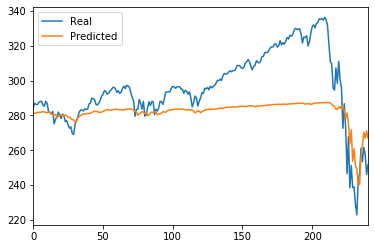

In [439]:
spy_model_px.plot()

# Create a Train-Test Split on all option data

In [470]:
#Create the features set (X) and target (y)
all_data3.head(1)
X = all_data3.drop(columns=['SPY Close']).values
y = all_data3['SPY Close'].values.reshape(-1, 1)


In [473]:

# Use 5% of the data for training and the remainder for testing
split = int(0.05 * len(X))
X_train = X[: split -1]
X_test = X[split:]
y_train = y[: split -1]
y_test = y[split:]

In [474]:
# Need to scale the data before trianing the LSTM model.  Use the minMaxScaler from SKlearn
# MinMaxScaler imported above code
scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

# Reshape Data to a vertical vector
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [475]:
# Define the Model
model = Sequential()

number_units = 5
dropout_fraction = .20

# Layer 1
model.add(LSTM(
    units= number_units,
    return_sequences = True,
    input_shape = (X_train.shape[1], 1))
    )

# Layer 2
model.add(LSTM(units = number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units = number_units))
model.add(Dropout(dropout_fraction))

# Output Layer
model.add(Dense(1))

In [476]:
# Compile the model, using the adam optimize, and use mse(Mean_Square_error) to predict continuous value
model.compile(optimizer = 'adam', loss='mean_squared_error')

# Summarize the model
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_36 (LSTM)               (None, 16, 5)             140       
_________________________________________________________________
lstm_37 (LSTM)               (None, 16, 5)             220       
_________________________________________________________________
dropout_30 (Dropout)         (None, 16, 5)             0         
_________________________________________________________________
lstm_38 (LSTM)               (None, 5)                 220       
_________________________________________________________________
dropout_31 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 6         
Total params: 586
Trainable params: 586
Non-trainable params: 0
_______________________________________________________

In [477]:
# Training the Model - Shuffle needs to be false since predicting on a time-series

model.fit(X_train, y_train, epochs =15, shuffle=False, batch_size=1, verbose=1)

Train on 38 samples
Epoch 1/15
38/38 [==============================] - 10s 265ms/sample - loss: 9.0353e-04
Epoch 2/15
38/38 [==============================] - 2s 54ms/sample - loss: 0.0021
Epoch 3/15
38/38 [==============================] - 2s 57ms/sample - loss: 0.0018
Epoch 4/15
38/38 [==============================] - 2s 65ms/sample - loss: 0.0019
Epoch 5/15
38/38 [==============================] - 2s 61ms/sample - loss: 0.0015
Epoch 6/15
38/38 [==============================] - 2s 60ms/sample - loss: 0.0016
Epoch 7/15
38/38 [==============================] - 2s 62ms/sample - loss: 0.0013
Epoch 8/15
38/38 [==============================] - 2s 63ms/sample - loss: 0.00160s - loss: 0.00
Epoch 9/15
38/38 [==============================] - 2s 61ms/sample - loss: 0.0016
Epoch 10/15
38/38 [==============================] - 2s 60ms/sample - loss: 0.0017
Epoch 11/15
38/38 [==============================] - 2s 58ms/sample - loss: 0.0011
Epoch 12/15
38/38 [==============================] - 2s

In [479]:
# Evaluate the Model on the testing data
model.evaluate(X_test, y_test)

745/745 [==============================] - 0s 616us/sample - loss: 0.1879


0.18791507527782214

In [480]:
# Making Prediction using the LTSM
predicted = model.predict(X_test)

# Since we used MinMaxScaler, we need to recover original price data to better understand (inverse_transform)

predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [481]:
# Plotting Predicted Vs. Real Prices
df = pd.DataFrame({
    "Actual": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
})
df.head()

Actual   Predicted
0  223.349350  220.428848
1  220.481628  220.408676
2  221.000458  220.407150
3  220.764664  220.406723
4  220.604263  220.401749

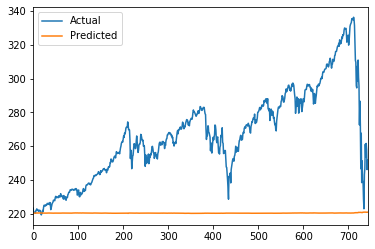

In [482]:
df.plot()

In [483]:
# Bring in Bond Data BAML OAS Fixed Income Spread
FICC_df = pd.read_csv("BAMLOASFICC.csv")
FICC_df["DATE"] = pd.to_datetime(FICC_df["DATE"], infer_datetime_format=True)
FICC_df.rename(columns = {'DATE':'Date'}, inplace = True) 
FICC_df.rename(columns = {'BAMLH0A0HYM2':'FICC_Spread'}, inplace = True)
FICC_df['FICC_Spread']=FICC_df['FICC_Spread'].astype('str')
FICC_df.set_index(("Date"), inplace=True)
FICC_df['FICC_Spread'] = pd.to_numeric(FICC_df['FICC_Spread'], errors='coerce')
FICC_df.dropna(inplace=True)
FICC_df.dtypes

FICC_Spread    float64
dtype: object

In [484]:
# Bring in TED Spread Data
Ted_df = pd.read_csv("TEDRATE.csv")
Ted_df["Date"] = pd.to_datetime(Ted_df["Date"],infer_datetime_format=True) 

Ted_df['TEDSPREAD']=Ted_df['TEDSPREAD'].astype('str')
Ted_df.set_index(("Date"), inplace=True)
Ted_df['TEDSPREAD'] = pd.to_numeric(Ted_df['TEDSPREAD'], errors='coerce')
Ted_df.dropna(inplace=True)
Ted_df.head()
Ted_df.isnull().sum()

TEDSPREAD    0
dtype: int64

In [485]:
# Bring in Gold Prices
gold_df = pd.read_csv("Gold.csv")
gold_df["Date"] = pd.to_datetime(gold_df["Date"], infer_datetime_format=True)
gold_df.set_index(("Date"), inplace=True)
# Rename Gold Price Close
gold_df.rename(columns={'GOLDAMGBD228NLBM':'Gold_Close'}, inplace=True)
gold_df['Gold_Close'] = gold_df['Gold_Close'].astype('str')
gold_df['Gold_Close'] = pd.to_numeric(gold_df['Gold_Close'], errors='coerce')
gold_df.dropna(inplace=True)
gold_df.isnull().sum()

Gold_Close    0
dtype: int64

In [508]:
# Bring in 10Y - 2Y Treasury
treasury_df = pd.read_csv("T10Y2Y.csv")
treasury_df['Date'] = pd.to_datetime(treasury_df['Date'], infer_datetime_format=True)
treasury_df.set_index(('Date'), inplace=True)
# Rename Column delta_10Y2Y
treasury_df.rename(columns={'T10Y2Y': 'Delta_10Y2Y'}, inplace=True)
treasury_df['Delta_10Y2Y'] = treasury_df['Delta_10Y2Y'].astype('str')
treasury_df['Delta_10Y2Y'] = pd.to_numeric(treasury_df['Delta_10Y2Y'], errors = 'coerce')
treasury_df.dropna(inplace=True)
treasury_df.head()
#treasury_df.isnull().sum()

Delta_10Y2Y
Date                   
2017-01-03         1.23
2017-01-04         1.22
2017-01-05         1.20
2017-01-06         1.20
2017-01-09         1.17

In [510]:
# Bring in 10 Year Treasury Yield
yield_10_df = pd.read_csv('10Y.csv')
yield_10_df['Date'] = pd.to_datetime(yield_10_df['Date'], infer_datetime_format=True)
yield_10_df.set_index(('Date'), inplace=True)
# Convert Dtypes
yield_10_df['10Y_Yield'] = yield_10_df['10Y_Yield'].astype('str')
yield_10_df['10Y_Yield'] = pd.to_numeric(yield_10_df['10Y_Yield'], errors = 'coerce')
yield_10_df.dropna(inplace=True)
yield_10_df.head(1)
#yield_10_df.isnull().sum()

10Y_Yield    0
dtype: int64

# Combine New Data Set (FICC, Gold, TED, Treasury)

In [511]:
# Concat all Dataframes Drop Null Values and Run Correlation
all_data3 = pd.concat([all_data2, FICC_df, Ted_df, gold_df, treasury_df, yield_10_df], axis=1)
all_data3.isnull().sum()
all_data3.dropna(inplace=True)
all_data3.head()
all_data3.corr()
#for col in all_data3.columns: 
#    print(col) 

SPY Close  Daily Returns  Cumulative Returns  \
SPY Close                    1.000000       0.044272            1.000000   
Daily Returns                0.044272       1.000000            0.044272   
Cumulative Returns           1.000000       0.044272            1.000000   
VIX Close                    0.039656      -0.231112            0.039656   
SPX 1M 25DP Vol BVOL INDEX   0.160406      -0.205481            0.160406   
SPX 1M 25DC Vol BVOL INDEX   0.142358      -0.205533            0.142358   
SPX 1M 100 Vol BVOL INDEX    0.156472      -0.213723            0.156472   
P/C Ratio                    0.071916      -0.035690            0.071916   
P/C Spread                   0.188982      -0.194606            0.188982   
P/ATM Ratio                 -0.169158       0.056402           -0.169158   
P/ATM Spread                 0.165643      -0.140431            0.165643   
ATM/C Ratio                  0.298811      -0.118821            0.298811   
ATM/C Spread                 0.198045      -0.229613            0.198045   
FICC_Spread                 -0.068357      -0.079341           -0.068357   
TEDSPREAD                   -0.280872       0.004401           -0.280872   
Gold_Close                   0.651953      -0.042765            0.651953   
Delta_10Y2Y                 -0.812440       0.032584           -0.812440   
10Y_Yield                   -0.299528       0.060097           -0.299528   

                            VIX Close  SPX 1M 25DP Vol BVOL INDEX  \
SPY Close                    0.039656                    0.160406   
Daily Returns               -0.231112                   -0.205481   
Cumulative Returns           0.039656                    0.160406   
VIX Close                    1.000000                    0.892538   
SPX 1M 25DP Vol BVOL INDEX   0.892538                    1.000000   
SPX 1M 25DC Vol BVOL INDEX   0.893420                    0.991720   
SPX 1M 100 Vol BVOL INDEX    0.889625                    0.997213   
P/C Ratio                   -0.067268                    0.012589   
P/C Spread                   0.843981                    0.964608   
P/ATM Ratio                 -0.294796                   -0.298081   
P/ATM Spread                 0.819348                    0.915452   
ATM/C Ratio                  0.208384                    0.343529   
ATM/C Spread                 0.815388                    0.950037   
FICC_Spread                  0.862933                    0.768149   
TEDSPREAD                    0.584759                    0.449499   
Gold_Close                   0.419639                    0.511656   
Delta_10Y2Y                 -0.214991                   -0.251299   
10Y_Yield                   -0.393463                   -0.466369   

                            SPX 1M 25DC Vol BVOL INDEX  \
SPY Close                                     0.142358   
Daily Returns                                -0.205533   
Cumulative Returns                            0.142358   
VIX Close                                     0.893420   
SPX 1M 25DP Vol BVOL INDEX                    0.991720   
SPX 1M 25DC Vol BVOL INDEX                    1.000000   
SPX 1M 100 Vol BVOL INDEX                     0.996174   
P/C Ratio                                    -0.098535   
P/C Spread                                    0.922760   
P/ATM Ratio                                  -0.381317   
P/ATM Spread                                  0.868937   
ATM/C Ratio                                   0.249413   
ATM/C Spread                                  0.914652   
FICC_Spread                                   0.756174   
TEDSPREAD                                     0.459166   
Gold_Close                                    0.465228   
Delta_10Y2Y                                  -0.261302   
10Y_Yield                                    -0.404954   

                            SPX 1M 100 Vol BVOL INDEX  P/C Ratio  P/C Spread  \
SPY Close                                    0.156472   0.071916    0.188982   
Daily Re

In [512]:
# Adding Subplots for Presentation Purposes
all_data3.hvplot(x='Date', y=['SPY Close', 'VIX Close','SPX 1M 25DP Vol BVOL INDEX','SPX 1M 25DC Vol BVOL INDEX', 
                              'SPX 1M 100 Vol BVOL INDEX','P/C Ratio', 'P/C Spread','P/ATM Ratio','P/ATM Spread',
                              'ATM/C Ratio','ATM/C Spread','FICC_Spread', 'TEDSPREAD', 'Gold_Close',
                             'Delta_10Y2Y', '10Y_Yield'], 
                width=450, height=300, subplots=True, shared_axes=False, color="midnightblue").cols(2)

:NdLayout   [Variable]
   :Curve   [Date]   (value)

In [513]:
all_data3.to_csv("TheData.csv")